<a href="https://colab.research.google.com/github/felipecortesl-dotcom/Tareas/blob/main/tarea10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de puntos generados: 81  (debería ser N+1 = 81)
Paso h = 0.25
Rango de y(t):  min = -0.034505,  max = 0.032296


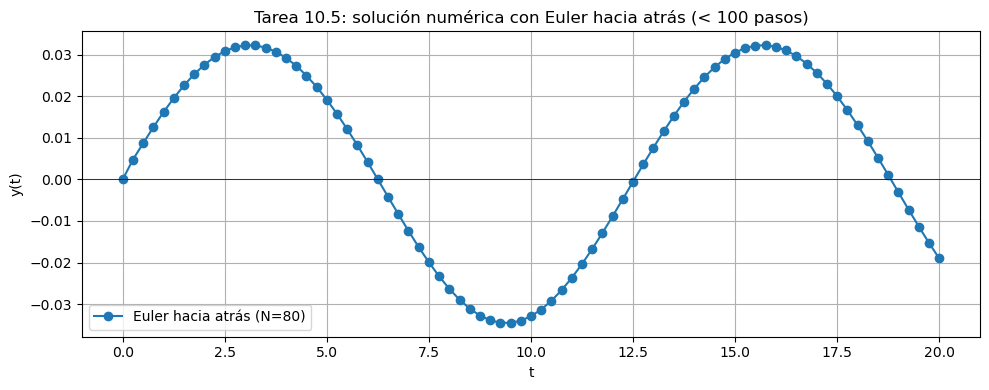

In [1]:
# ============================================================
# Tarea 10.5
# y' = -30(y + y^2) + sin(t/2),  0 <= t <= 20,  y(0) = 0
# Método: Euler hacia atrás (implícito), N < 100 pasos
# ============================================================

import numpy as np
import math
import matplotlib.pyplot as plt

# ------------------------------
# Definimos la EDO
# ------------------------------
def f(t, y):
    return -30*(y + y**2) + math.sin(t/2)

# -------------------------------------------------
# Paso de Euler hacia atrás:
# y_{n+1} = y_n + h * f(t_{n+1}, y_{n+1})
#
# Con f(t,y) = -30(y + y^2) + sin(t/2) esto da
# una ecuación cuadrática en y_{n+1}:
#
#   30h y_{n+1}^2 + (-1 + 30h) y_{n+1} + (y_n - h sin(t_{n+1}/2)) = 0
#
# La resolvemos con la fórmula cuadrática y elegimos
# la raíz que es más cercana al paso de Euler explícito
# para tener continuidad en la solución.
# -------------------------------------------------
def backward_euler_step(tn, yn, h):
    tp = tn + h

    a = 30*h
    b = -1 + 30*h
    c = yn - h*math.sin(tp/2)

    disc = b*b - 4*a*c
    if disc < 0:
        disc = 0.0
    sqrt_disc = math.sqrt(disc)

    # Dos raíces posibles
    y1 = (-b + sqrt_disc)/(2*a)
    y2 = (-b - sqrt_disc)/(2*a)

    # Predicción con Euler explícito (para escoger raíz)
    y_exp = yn + h*f(tn, yn)

    # Elegimos la raíz más cercana a la predicción explícita
    if abs(y1 - y_exp) < abs(y2 - y_exp):
        return y1
    else:
        return y2

# -------------------------------------------------
# Resolver en [0,20] con N<100 pasos (tomamos N=80)
# -------------------------------------------------
t0, y0, Tfinal = 0.0, 0.0, 20.0
N = 80                     # < 100 pasos
h = (Tfinal - t0)/N

T = [t0]
Y = [y0]
t = t0
y = y0

for n in range(N):
    y = backward_euler_step(t, y, h)
    t = t + h
    T.append(t)
    Y.append(y)

T = np.array(T)
Y = np.array(Y)

print(f"Número de puntos generados: {len(T)}  (debería ser N+1 = {N+1})")
print(f"Paso h = {h}")
print(f"Rango de y(t):  min = {Y.min():.6f},  max = {Y.max():.6f}")

# -------------------------------------------------
# Gráfico de la solución numérica
# -------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(T, Y, 'o-', label='Euler hacia atrás (N=80)')
plt.axhline(0, color='k', linewidth=0.5)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Tarea 10.5: solución numérica con Euler hacia atrás (< 100 pasos)')
plt.legend()
plt.tight_layout()
plt.show()


## Nota: 7.0

Demasiado uso de IA sin citarla apropiadamente.